# Name: Sarmad Hassan

## The Sparks Foundation: Data Science and Business Analytics Internship

### Task 8: Timeline Analysis (Covid-19)

● Analyze Data showing spread of Covid-19 cases in your country or any region (Asia, Europe, BRICS etc)

● Identify interesting patterns and possible reasons helping Covid-19 spread with basic as well as advanced charts

### Import Required Libraries

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 
import warnings
warnings.filterwarnings("ignore")

In [61]:
df = pd.read_excel("book1.xlsx",engine='openpyxl')

In [62]:
df.head(5)

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,total_tests,new_tests,tests_per_case,cardiovasc_death_rate,life_expectancy,human_development_index
0,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597.029,64.83,0.498
1,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597.029,64.83,0.498
2,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597.029,64.83,0.498
3,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597.029,64.83,0.498
4,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597.029,64.83,0.498


In [63]:
df = df.drop(columns = ["total_cases", "total_deaths", "total_tests", "icu_patients", "hosp_patients", "reproduction_rate", "cardiovasc_death_rate", "human_development_index"])
df.head()

,continent,location,date,new_cases,new_deaths,new_tests,tests_per_case,life_expectancy
0,Asia,Afghanistan,2020-02-24,1.0,NaN,NaN,NaN,64.83
1,Asia,Afghanistan,2020-02-25,0.0,NaN,NaN,NaN,64.83
2,Asia,Afghanistan,2020-02-26,0.0,NaN,NaN,NaN,64.83
3,Asia,Afghanistan,2020-02-27,0.0,NaN,NaN,NaN,64.83
4,Asia,Afghanistan,2020-02-28,0.0,NaN,NaN,NaN,64.83


In [64]:
df = df[df["location"] != "World"]

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61108 entries, 0 to 61473
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   continent        60758 non-null  object 
 1   location         61108 non-null  object 
 2   date             61108 non-null  object 
 3   new_cases        60501 non-null  float64
 4   new_deaths       52003 non-null  float64
 5   new_tests        28657 non-null  float64
 6   tests_per_case   29988 non-null  float64
 7   life_expectancy  60444 non-null  float64
dtypes: float64(5), object(3)
memory usage: 4.2+ MB


In [66]:
df.isnull().sum()

continent            350
location               0
date                   0
new_cases            607
new_deaths          9105
new_tests          32451
tests_per_case     31120
life_expectancy      664
dtype: int64

In [67]:
df.describe()

,new_cases,new_deaths,new_tests,tests_per_case,life_expectancy
count,60501.000000,52003.000000,2.865700e+04,29988.000000,60444.000000
mean,1597.796565,40.179182,3.502635e+04,163.693391,73.144133
std,9084.884381,172.329321,1.410598e+05,828.123859,7.572144
min,-46076.000000,-1918.000000,-4.751000e+04,1.600000,53.280000
25%,1.000000,0.000000,1.234000e+03,8.400000,67.440000
50%,41.000000,1.000000,4.685000e+03,21.400000,74.620000
75%,468.000000,11.000000,1.764500e+04,69.000000,78.730000
max,298031.000000,4462.000000,2.945871e+06,44258.700000,86.750000


**Countinents by Cases & Deaths**

In [68]:
continents = df.groupby("continent")["new_cases", "new_deaths"].agg(["sum"]).reset_index()
continents.columns = ["Continent", "Cases", "Deaths"]
continents["Cases %"] = (continents["Cases"] / sum(continents["Cases"])) * 100
continents["Deaths %"] = (continents["Deaths"] / sum(continents["Deaths"])) * 100
continents.sort_values(by = "Deaths", ascending = False)

,Continent,Cases,Deaths,Cases %,Deaths %
2,Europe,28541696.0,652860.0,29.525617,31.245947
3,North America,28171363.0,594806.0,29.142517,28.467476
5,South America,15001410.0,396141.0,15.518555,18.959349
1,Asia,21557123.0,361890.0,22.300264,17.320093
0,Africa,3364031.0,82781.0,3.480000,3.961907
4,Oceania,31946.0,945.0,0.033047,0.045228


**Maximum Cases in Continents by Dates**

In [84]:
mcd = df.groupby(["date", "continent", "new_cases"])["new_cases"].agg(["max"])
mcd = mcd.sort_values(by = "max", ascending = False).reset_index()
mcd

,date,continent,new_cases,max
0,2021-01-02,North America,298031.0,298031.0
1,2021-01-08,North America,292726.0,292726.0
2,2021-01-07,North America,275026.0,275026.0
3,2021-01-09,North America,264620.0,264620.0
4,2021-01-06,North America,251783.0,251783.0
...,...,...,...,...
44540,2020-04-07,Europe,-3491.0,-3491.0
44541,2020-09-07,South America,-7953.0,-7953.0
44542,2020-04-24,Europe,-10034.0,-10034.0
44543,2020-04-04,Europe,-17074.0,-17074.0


**Maximum Life Expectancy by Continent**

In [95]:
cont_life_m = df.groupby("continent")["life_expectancy"].agg(["max"]).reset_index()
cont_life_m.columns = ["Continent", "Max"]
cont_life_m.sort_values(by = "Max", ascending = False)

,Continent,Max
2,Europe,86.75
1,Asia,84.86
4,Oceania,83.44
3,North America,82.43
5,South America,80.18
0,Africa,76.88


**Minimum Life Expectancy by Continent**

In [97]:
cont_life_n = df.groupby("continent")["life_expectancy"].agg(["min"]).reset_index()
cont_life_n.columns = ["Continent", "Min"]
cont_life_n.sort_values(by = "Min", ascending = True)

,Continent,Min
0,Africa,53.28
3,North America,64.00
4,Oceania,64.50
1,Asia,64.83
5,South America,69.91
2,Europe,71.90


**Minumium and Maximum Life Expectancy by Continent**

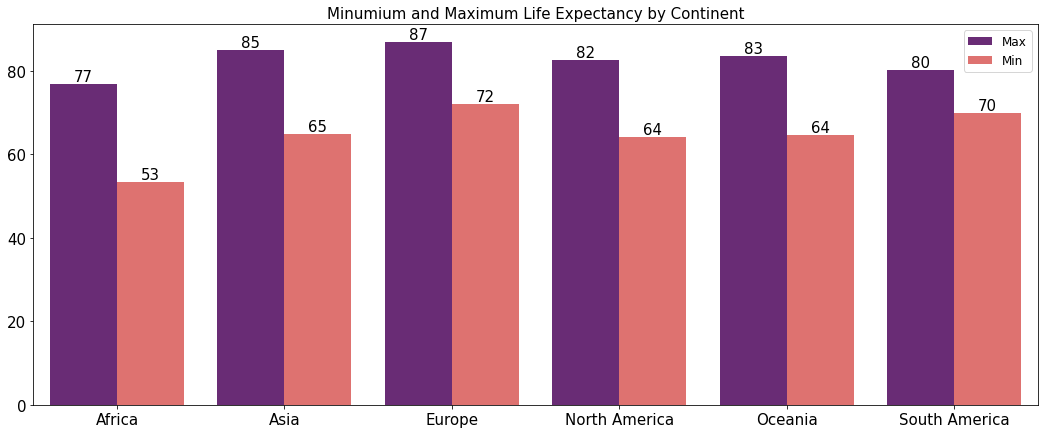

In [98]:
min_max_life = pd.merge(cont_life_m, cont_life_n, on = "Continent")
min_max_life = min_max_life.melt("Continent", var_name = "Life Expectancy", value_name = "Age")
min_max_life
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Continent", y = "Age", hue = "Life Expectancy", data = min_max_life, palette = "magma")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Minumium and Maximum Life Expectancy by Continent", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.legend(loc = 1, prop={'size': 12})
plt.show()

**Top 10 Locations with Cases and Deaths**

In [69]:
countries_cases_m = df.groupby(["location"])["new_cases", "new_deaths"].agg(["sum"]).reset_index()
countries_cases_m.columns = ["Countries", "Cases", "Deaths"]
countries_cases_m = countries_cases_m.sort_values(by = "Deaths", ascending = False)
countries_cases_m_head = countries_cases_m.head(10)
countries_cases_m_head["Cases %"] = (countries_cases_m_head["Cases"] / sum(countries_cases_m_head["Cases"])) * 100
countries_cases_m_head["Deaths %"] = (countries_cases_m_head["Deaths"] / sum(countries_cases_m_head["Deaths"])) * 100
countries_cases_m_head

,Countries,Cases,Deaths,Cases %,Deaths %
182,United States,24627674.0,410102.0,39.660868,30.338441
23,Brazil,8697368.0,214147.0,14.006405,15.842123
77,India,10625424.0,153030.0,17.111382,11.320822
111,Mexico,1688944.0,144371.0,2.719907,10.680248
181,United Kingdom,3553773.0,94765.0,5.723063,7.010506
84,Italy,2428221.0,84202.0,3.910453,6.229078
60,France,3046371.0,72139.0,4.905933,5.336684
141,Russia,3616680.0,66810.0,5.824369,4.942456
80,Iran,1354520.0,57150.0,2.181344,4.227831
162,Spain,2456675.0,55041.0,3.956276,4.071812


**Top 10 Locations with low Cases**

In [70]:
countries_cases_l = df.groupby("location")["new_cases", "new_deaths"].agg(["sum"]).reset_index()
countries_cases_l.columns = ["Countries", "Cases", "Deaths"]
countries_cases_l.sort_values(by = "Cases", ascending = True).head(10)

,Countries,Cases,Deaths
74,Hong Kong,0.0,0.0
185,Vanuatu,1.0,0.0
112,Micronesia (country),1.0,0.0
146,Samoa,2.0,0.0
108,Marshall Islands,4.0,0.0
157,Solomon Islands,17.0,0.0
186,Vatican,27.0,0.0
143,Saint Kitts and Nevis,35.0,0.0
93,Laos,41.0,0.0
173,Timor,53.0,0.0


**Highest Number of deaths and cases by Dates**

In [71]:
dates = df.groupby("date")["new_cases", "new_deaths"].agg(["sum"]).reset_index()
dates.columns = ["Date", "Cases", "Deaths"]
dates.sort_values(by = "Deaths", ascending = False).head()

,Date,Cases,Deaths
385,2021-01-20,694123.0,17817.0
377,2021-01-12,704100.0,17096.0
384,2021-01-19,608286.0,16840.0
378,2021-01-13,750197.0,16612.0
373,2021-01-08,822139.0,15898.0


**Top 10 Life Expectency by Countries**

In [72]:
life_cont = df.groupby("location")["life_expectancy", "new_cases", "new_deaths"].agg(["max"]).reset_index()
life_cont.columns = ["Country", "Life Expectancy", "Cases", "Deaths"]
life_cont_head = life_cont.sort_values(by = "Life Expectancy", ascending = False).head(10)
life_cont_head

,Country,Life Expectancy,Cases,Deaths
114,Monaco,86.75,40.0,3.0
147,San Marino,84.97,76.0,6.0
74,Hong Kong,84.86,NaN,NaN
86,Japan,84.63,7863.0,314.0
167,Switzerland,83.78,21926.0,171.0
3,Andorra,83.73,299.0,6.0
154,Singapore,83.62,1426.0,2.0
162,Spain,83.56,84287.0,1623.0
84,Italy,83.51,40902.0,993.0
8,Australia,83.44,716.0,59.0


**Low 10 Life Expectency by Countries**

In [73]:
life_cont = df.groupby("location")["life_expectancy", "new_cases", "new_deaths"].agg(["max"]).reset_index()
life_cont.columns = ["Country", "Life Expectancy", "Cases", "Deaths"]
life_cont.sort_values(by = "Life Expectancy", ascending = True).head(10)

,Country,Life Expectancy,Cases,Deaths
32,Central African Republic,53.28,216.0,7.0
33,Chad,54.24,91.0,10.0
96,Lesotho,54.33,931.0,14.0
126,Nigeria,54.69,1964.0,31.0
153,Sierra Leone,54.70,86.0,7.0
158,Somalia,57.40,288.0,8.0
40,Cote d'Ivoire,57.78,430.0,4.0
161,South Sudan,57.85,323.0,5.0
70,Guinea-Bissau,58.32,156.0,4.0
53,Equatorial Guinea,58.74,1750.0,32.0


**Maximum Cases in Countries by Dates**

In [87]:
mcd = df.groupby(["date", "location"])["new_cases"].agg(["max"])
mcd = mcd.sort_values(by = "max", ascending = False).reset_index()
mcd

,date,location,max
0,2021-01-02,United States,298031.0
1,2021-01-08,United States,292726.0
2,2021-01-07,United States,275026.0
3,2021-01-09,United States,264620.0
4,2021-01-06,United States,251783.0
...,...,...,...
61103,2021-01-18,Hong Kong,NaN
61104,2021-01-19,Hong Kong,NaN
61105,2021-01-22,Austria,NaN
61106,2021-01-22,Brazil,NaN


**Maximum Test Per Case in Countries by Dates**

In [89]:
mcd = df.groupby(["date", "location"])["tests_per_case"].agg(["max"])
mcd = mcd.sort_values(by = "max", ascending = False).reset_index()
mcd

,date,location,max
0,2020-04-22,Vietnam,44258.7
1,2020-09-24,Vietnam,37002.3
2,2020-04-28,Vietnam,30601.4
3,2020-05-26,New Zealand,27035.0
4,2020-04-24,Vietnam,26975.5
...,...,...,...
61103,2021-01-21,Yemen,NaN
61104,2021-01-21,Zimbabwe,NaN
61105,2021-01-22,Austria,NaN
61106,2021-01-22,Brazil,NaN
